# CNN avec des images personnalisées

## Les données

-----------



--------
----------
--------

SOURCE DE DONNÉES ORIGINALE :

L'ensemble de données contient 2 dossiers - Infected - Uninfected

Et un total de 27 558 images.

Cet ensemble de données est extrait du site officiel du NIH : https://ceb.nlm.nih.gov/repositories/malaria-datasets/ 

**Note : Il y a trop de données pour qu'elles tiennent en mémoire sous forme de tableau numérique, nous devrons donc les introduire par lots dans notre modèle. **

## Visualisation des données

-------
Examinons les données de plus près.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [ ]:
# Téléchargement et extraction du fichier zip
import requests, zipfile, io
zip_file_url = 'https://moncoachdata.com/wp-content/uploads/cell_images.zip'
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [ ]:
# Chemin d'accès du dossier cell_images
my_data_dir = 'cell_images'

In [ ]:
# Confirmez que cela retourne 'test' et 'train'
os.listdir(my_data_dir) 

['train', 'test']

In [ ]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

In [ ]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [ ]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [ ]:
os.listdir(train_path+'parasitized')[0]

'C59P20thinF_IMG_20150803_113809_cell_41.png'

In [ ]:
para_cell = train_path+'/parasitized'+'/C59P20thinF_IMG_20150803_113809_cell_41.png'

In [ ]:
para_img = imread(para_cell)

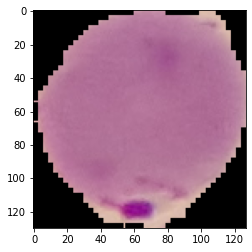

In [ ]:
plt.imshow(para_img);

In [ ]:
para_img.shape

(130, 127, 3)

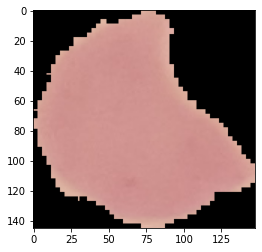

In [ ]:
unifected_cell_path = train_path+'uninfected/'+os.listdir(train_path+'/uninfected')[0]
unifected_cell = imread(unifected_cell_path)
plt.imshow(unifected_cell);

**Vérifions combien d'images il y a.**

In [ ]:
len(os.listdir(train_path+'parasitized'))

12480

In [ ]:
len(os.listdir(train_path+'uninfected'))

12480

**Découvrons les dimensions moyennes de ces images.**

In [ ]:
unifected_cell.shape

(145, 148, 3)

In [ ]:
para_img.shape

(130, 127, 3)

In [ ]:
# d'autres options : 
# https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python

dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'uninfected'):
    
    img = imread(test_path+'uninfected'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

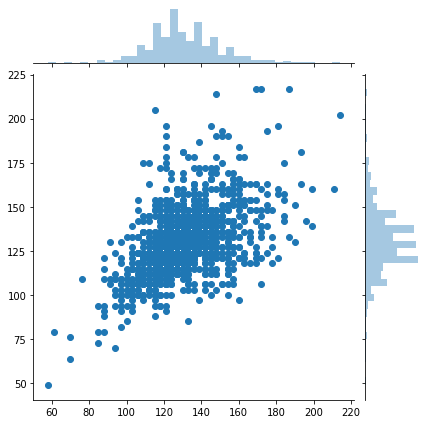

In [ ]:
sns.jointplot(dim1,dim2);

In [ ]:
np.mean(dim1)

130.92538461538462

In [ ]:
np.mean(dim2)

130.75

In [ ]:
image_shape = (130,130,3)

## Préparation des données pour le modèle

La mémoire contient trop de données pour que nous puissions les lire toutes en même temps. Nous pouvons utiliser certaines fonctions intégrées dans Keras pour traiter automatiquement les données, générer un flux de batches à partir d'un répertoire, et également manipuler les images.

### Manipulation des images

C'est généralement une bonne idée de manipuler les images avec une rotation, un redimensionnement et une mise à l'échelle afin que le modèle devienne plus robuste aux différentes images que notre ensemble de données n'a pas. Nous pouvons utiliser le générateur **ImageDataGenerator** pour le faire automatiquement pour nous. Consultez la documentation pour une liste complète de tous les paramètres que vous pouvez utiliser ici !

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_std_normalization: Boolean.
 |          Divide inputs by std of the dataset, feature-wise.
 |      samplewise_std_normalization: Boolean. Divide each input by its std.
 |      zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
 |      zca_whitening: Boolean. Apply ZCA whitening.
 |      rotation_range: Int. Degree range for random rotations.
 |      width_shift_range: Float, 1-D array-like or int
 |          - float: fraction of total width, if < 1, or pixels if >= 1.
 |     

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20, # Faire pivoter l'image de 20 degrés
                               width_shift_range=0.10, # Modifier la largeur de la photo de 10% maximum
                               height_shift_range=0.10, # Modifier la hauteur de la photo de 10% maximum
                               # rescale=1/255, # Redimensionner l'image en la normalisant
                               shear_range=0.1, # shear signifie couper une partie de l'image (max 10%)
                               zoom_range=0.1, # Zoom de 10% maximum
                               horizontal_flip=True, # Autorise le basculement horizontal
                               fill_mode='nearest' # Remplir les pixels manquants avec la valeur remplie la plus proche
                              )

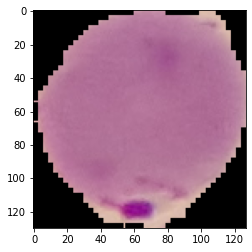

In [ ]:
plt.imshow(para_img);

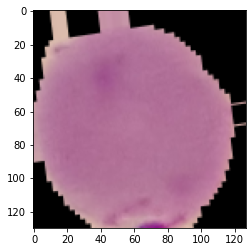

In [ ]:
plt.imshow(image_gen.random_transform(para_img));

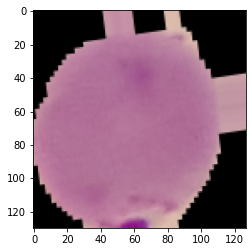

In [ ]:
plt.imshow(image_gen.random_transform(para_img));

### Génération de nombreuses images manipulées à partir d'un répertoire


Pour utiliser .flow_from_directory, vous devez organiser les images dans des sous-répertoires. C'est une exigence absolue, sinon la méthode ne fonctionnera pas. Les répertoires ne doivent contenir que les images d'une seule classe, donc un dossier par classe d'images.

Structure nécessaire :

* Dossier de données d'images
    * Classe 1
        * 0.jpg
        * 1.jpg
        * …
    * Classe 2
        * 0.jpg
        * 1.jpg
        * …
    * …
    * Classe n

In [ ]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


## Création du Modèle

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [ ]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Les couches Dropout aident à réduire l'overfitting en désactivant les neurones de façon aléatoire pendant l'entraînement.
# Ici nous demandons de désactiver aléatoirement 50% des neurones.
model.add(Dropout(0.5))

# Dernière couche, n'oubliez pas c'est binaire, nous utilisons donc la sigmoïde
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

### Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

### Entraînement du Modèle

In [ ]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module tensorflow.python.keras.preprocessing.image:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest') method of tensorflow.python.keras.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    Arguments:
        directory: string, path to the target directory. It should contain one
          subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images inside
          each of the subdirectories directory tree will be included in the
          generator. See [this script](
            https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
              for more details.
        target_size: Tuple of integers `(height, width)`, defaults to `(256,
         

In [ ]:
batch_size = 16

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
results = model.fit(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 160s 103ms/step - loss: 0.8300 - accuracy: 0.5510 - val_loss: 0.6811 - val_accuracy: 0.5819
Epoch 2/20
1560/1560 [==============================] - 159s 102ms/step - loss: 0.6794 - accuracy: 0.5813 - val_loss: 0.6752 - val_accuracy: 0.5846
Epoch 3/20
1560/1560 [==============================] - 160s 102ms/step - loss: 0.6748 - accuracy: 0.5847 - val_loss: 0.6732 - val_accuracy: 0.5927
Epoch 4/20
1560/1560 [==============================] - 170s 109ms/step - loss: 0.6668 - accuracy: 0.6008 - val_loss: 0.6671 - val_accuracy: 0.6069
Epoch 5/20
1560/1560 [==============================] - 161s 103ms/step - loss: 0.6470 - accuracy: 0.6308 - val_loss: 0.6625 - val_accuracy: 0.6200
Epoch 6/20
1560/1560 [==============================] - 159s 102ms/step - loss: 0.2761 - accuracy: 0.9017 - val_loss: 0.2449 - val_accuracy: 0.9173
Epoch 7/20
1560/1560 [==============================] - 159s 102ms/step - loss: 0.1921 - accuracy: 0.9408 - val_

In [ ]:
from tensorflow.keras.models import load_model
model.save('malaria_detector.h5')

## Évaluation du Modèle

In [ ]:
losses = pd.DataFrame(model.history.history)

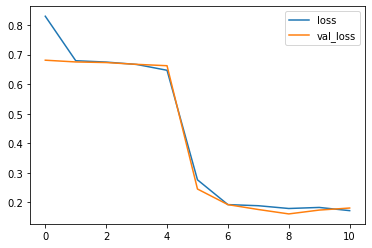

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(test_image_gen)

163/163 [==============================] - 14s 87ms/step - loss: 0.1702 - accuracy: 0.9492


[0.17019067704677582, 0.9492307901382446]

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras

pred_probabilities = model.predict(test_image_gen)

In [ ]:
pred_probabilities

array([[1.7985539e-04],
       [2.9305780e-05],
       [2.0475602e-05],
       ...,
       [9.6323198e-01],
       [9.1910744e-01],
       [9.6272987e-01]], dtype=float32)

In [ ]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
predictions = pred_probabilities > 0.5

In [ ]:
# Numpy peut traiter cela comme True/False pour nous

predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [ ]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1221,   79],
       [  55, 1245]])

## Prédiction sur une image

In [ ]:
para_cell

'cell_images/train//parasitized/C59P20thinF_IMG_20150803_113809_cell_41.png'

In [ ]:
my_image = image.load_img(para_cell,target_size=image_shape)

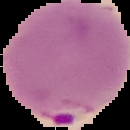

In [ ]:
my_image

In [ ]:
type(my_image)

PIL.Image.Image

In [ ]:
my_image = image.img_to_array(my_image)

In [ ]:
type(my_image)

numpy.ndarray

In [ ]:
my_image.shape

(130, 130, 3)

In [ ]:
my_image = np.expand_dims(my_image, axis=0)

In [ ]:
my_image.shape

(1, 130, 130, 3)

In [ ]:
(model.predict(my_image) > 0.5).astype('int32')

array([[0]], dtype=int32)

In [ ]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}